In [234]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
data = pd.read_csv('data.csv', header=0)
data = data.dropna(axis=0, how='any')

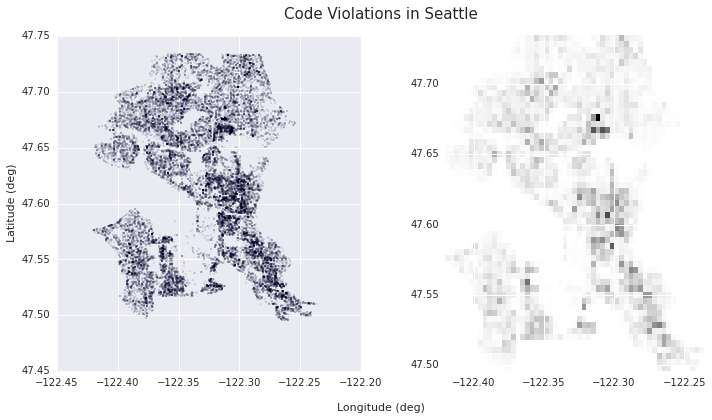

In [235]:
fig1 = plt.figure(1, figsize=(12,6))
ax1 = fig1.add_subplot(121, ylabel='Latitude (deg)')
ax2 = fig1.add_subplot(122)
ax1.get_xaxis().get_major_formatter().set_useOffset(False)
ax2.get_xaxis().get_major_formatter().set_useOffset(False)

ax1.scatter(data['Longitude'],data['Latitude'], s=0.1)

histogram = plt.hist2d(data['Longitude'],data['Latitude'],bins=55)
ax2.imshow(histogram[0], interpolation = "gaussian")
fig1.text(0.5, 0.04, 'Longitude (deg)', ha='center', va='center', fontsize=11)
fig1.text(0.5, 0.95, 'Code Violations in Seattle', ha='center', va='center', fontsize=15)

In [249]:
case_counts = data['Date Case Created'].value_counts()
inspec_counts = data['Last Inspection Date'].value_counts()

case_dates=case_counts.index.to_datetime()
inspec_dates=inspec_counts.index.to_datetime()

violations = pd.DataFrame({'Case Creation': pd.Series(case_counts.tolist(), index=case_dates),
                           'Case Inspection': pd.Series(inspec_counts.tolist(), index=inspec_dates)})

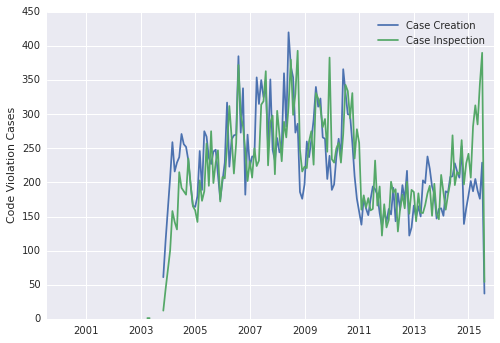

In [251]:
violations.resample('M',how='sum').plot()
plt.ylabel('Code Violation Cases')